---
---

# Objetivos del proyecto
* Como te ha explicado el director de data science el gran objetivo del proyecto en el que vas a trabajar es reducir la fuga de empleados de la empresa.


* Para ello durante esta semana vas a trabajar en 3 grandes cosas:


* Entender y cuantificar el problema desde el punto de vista de negocioDesarrollar un sistema automatizado de machine learning que identifique a los empleados que están en mayor riesgo de fuga Comunicar los resultados de forma exitosa a la dirección Quédate con estos objetivos en la cabeza porque centrarán el trabajo de esta semana Continuamos!
----

----
# Trabajo para hoy - 15/07/2023
* Hoy nos vamos a centrar solo en 2 tareas, pero de gran importancia.


* Entender el tipo de solución de data science que vamos a construir Configurar el entorno de trabajo en el que vamos a realizar el proyecto Empezamos con la tarea 1 en la siguiente lección.

### CARGA DE LIBRERIAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### CARGA DE LOS DATOS

Antes de continuar deberás:

* Haber descargado los datos de la plataforma

* Haberlos descomprimido en alguna carpeta de tu disco duro

* Haberlos subido a Colab mediante el explorador de archivos (icono de carpeta - icono de subir archivo)

In [2]:
data = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [3]:
data.tail()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3
2065,49,No,Travel_Frequently,Sales,2,Secundaria,Medical,1,Muy_Alta,NaN,...,Muy_Alta,80,0,17,3,NaN,9,NaN,0,8
2068,34,No,Travel_Rarely,Research & Development,8,NaN,Medical,1,Media,4.0,...,Baja,80,0,6,3,Muy_Alta,4,NaN,1,2


-----
# ANÁLISIS DE LOS DATOS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

* Observamos que tenemos 31 columnas y 2068 filas con tipos de valores flotantes, enteros y categoricos
----

### ANÁLISIS DE VALORES NULOS

In [5]:
data.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

* Vemos que años en el puesto y conciliación tiene muchos valores NULOS, alrededor del %50 o mas. Eliminaremos la variable


* Con las demas variables que contiene valores N/A podremos agregarle un valor de 0 o la media de cada columna en si hciendo el **Análisis exploratorio de los datos**

---

In [6]:
data.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
data.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2


----
### GRAFICAMOS LAS VARIABLES CATEGORICAS

In [7]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

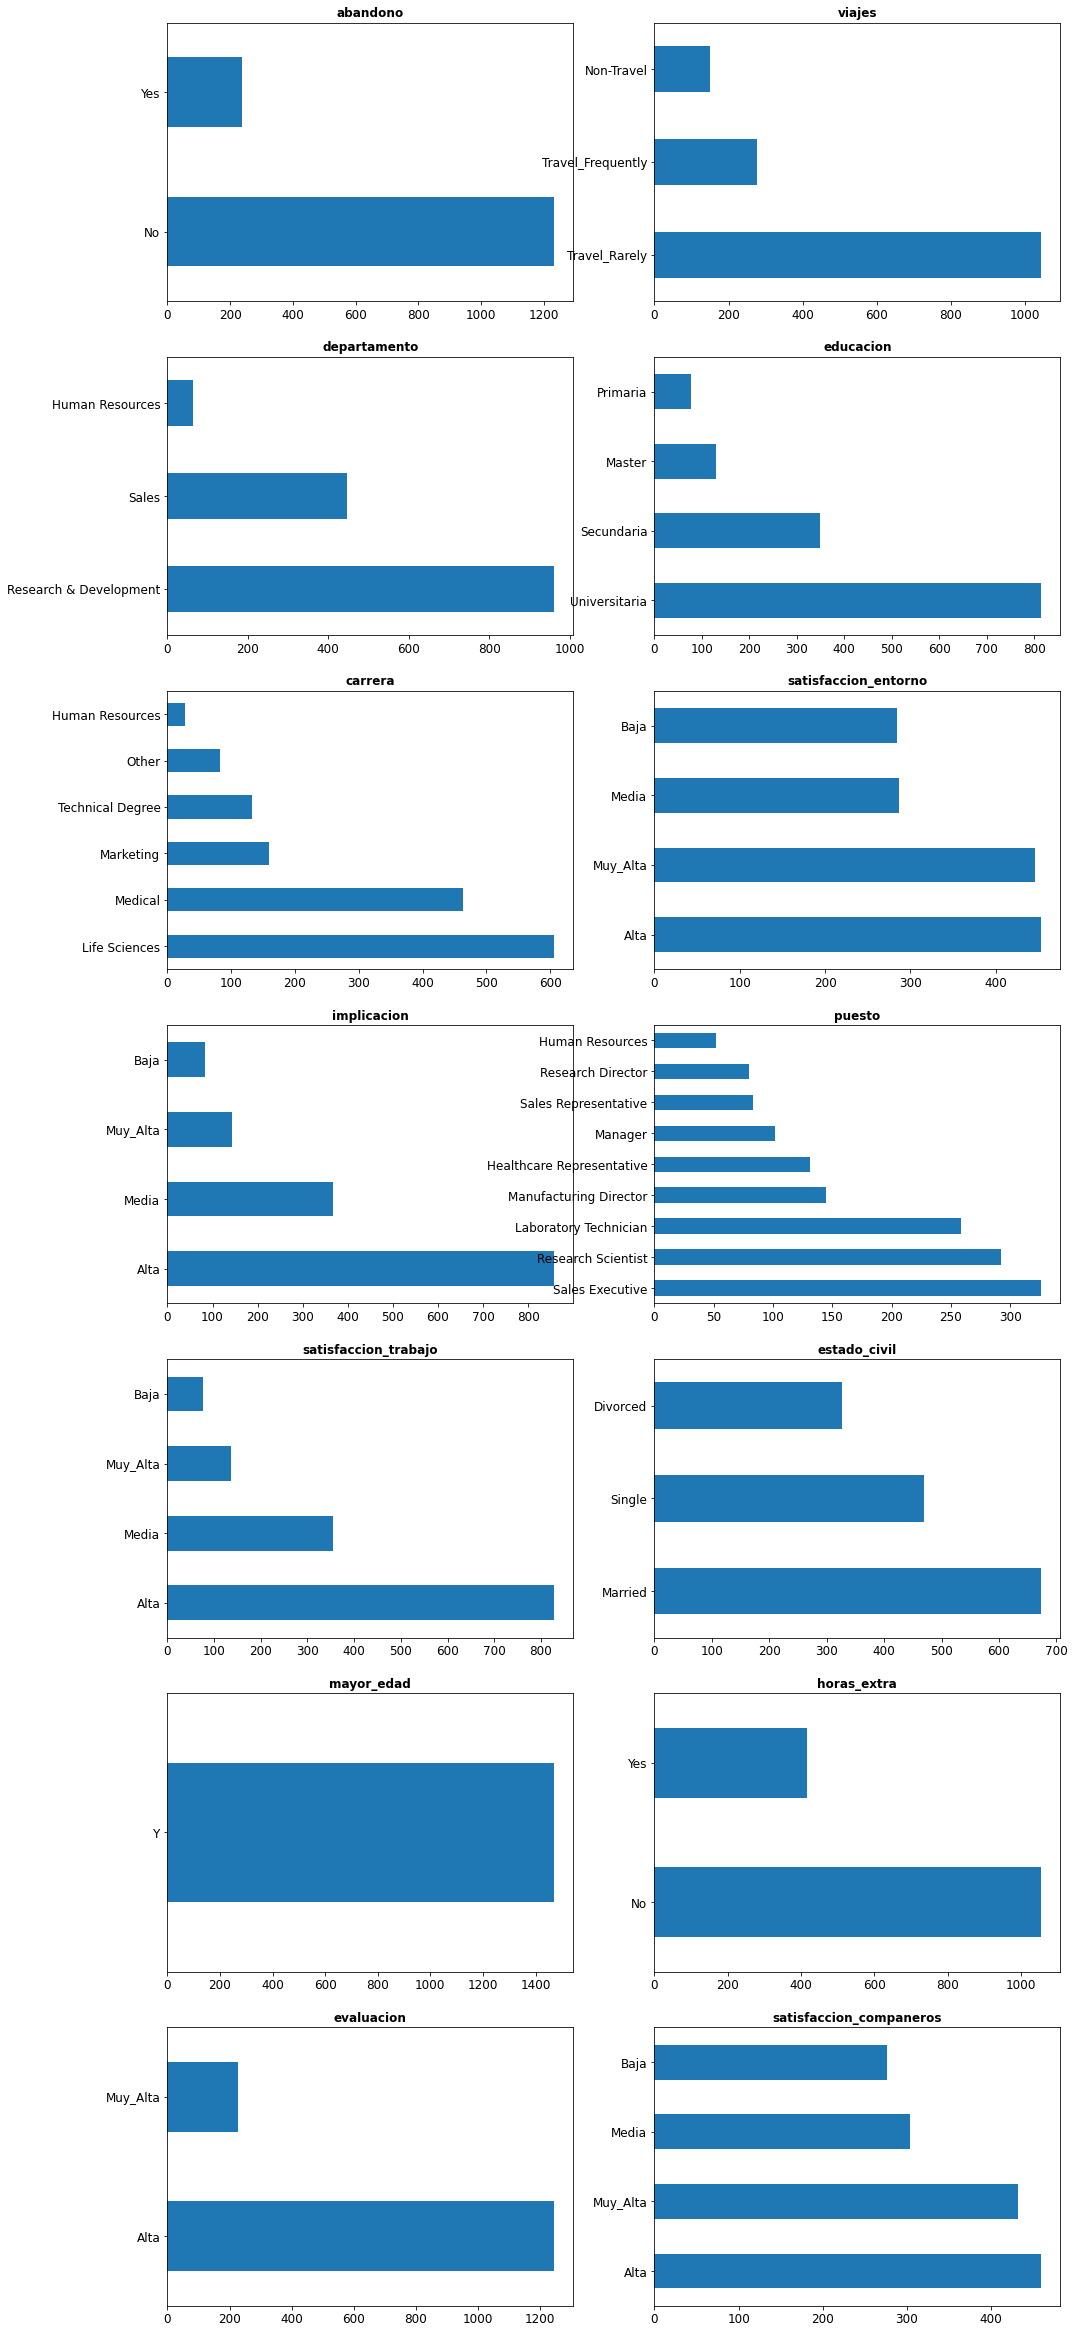

In [8]:
graficos_eda_categoricos(data.select_dtypes('O'))

### OBSERVACIÓN


* **mayor_edad** solo tiene un valor, podriamos eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * **educacion**= imputar por 'Universitaria'
  * **satisfaccion_trabajo**= imputar por 'Alta'
  * **implicacion**= imputar por 'Alta'
  
  
  
* **Es decir agregarle esto valores a los N/A que tenemos**

In [9]:
data.drop(columns = 'mayor_edad', inplace = True)

data['educacion'] = data['educacion'].fillna('Universitaria')

data['satisfaccion_trabajo'] = data['satisfaccion_trabajo'].fillna('Alta')

data['implicacion'] = data['implicacion'].fillna('Alta')

---
### GRAFICAMOS Y ANÁLISAMOS LAS VARIABLES NUMERICAS

In [10]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [11]:
estadisticos_cont(data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


###  OBSERVACIÓN:

* **Empleados** solo tiene un valor la tendremos que Eliminar
* la variable **Sexo** tiene 4 valores , la eliminaremos 
* **Horas quincena** solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada

----


In [12]:
### ELIMINAMOS LAS COLUMNAS CORRESPONDIENTES
data.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)

### GRAFICAMOS 

<AxesSubplot:xlabel='anos_con_manager_actual', ylabel='Count'>

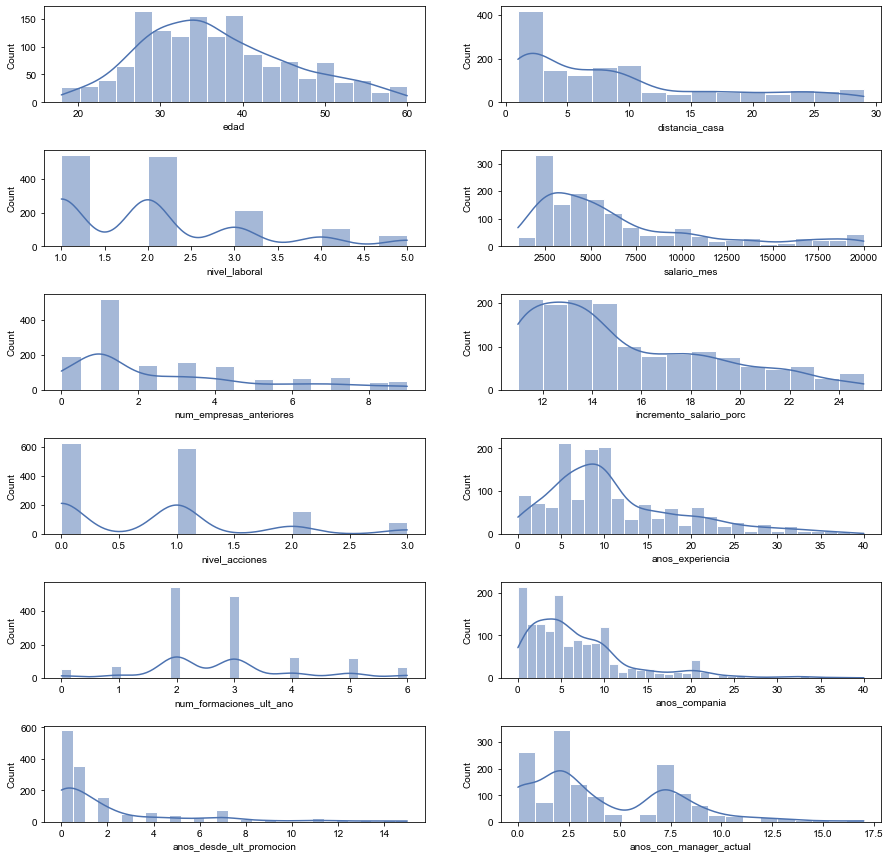

In [13]:
### Creamos una serie de subplots para graficarlo uno por uno

fig,ax = plt.subplots(6,2,figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

sns.set(font_scale =1)
sns.histplot(data['edad'],kde=True,ax=ax[0,0])
sns.histplot(data['distancia_casa'],kde=True,ax=ax[0,1])
sns.histplot(data['nivel_laboral'],kde=True,ax=ax[1,0])
sns.histplot(data['salario_mes'],kde=True,ax=ax[1,1])
sns.histplot(data['num_empresas_anteriores'],kde=True,ax=ax[2,0])
sns.histplot(data['incremento_salario_porc'],kde=True,ax=ax[2,1])
sns.histplot(data['nivel_acciones'],kde=True,ax=ax[3,0])
sns.histplot(data['anos_experiencia'],kde=True,ax=ax[3,1])
sns.histplot(data['num_formaciones_ult_ano'],kde=True,ax=ax[4,0])
sns.histplot(data['anos_compania'],kde=True,ax=ax[4,1])
sns.histplot(data['anos_desde_ult_promocion'],kde=True,ax=ax[5,0])
sns.histplot(data['anos_con_manager_actual'],kde=True,ax=ax[5,1])

---
## GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [14]:
data.abandono.value_counts(normalize = True)*100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

---
### ¿Hay un perfil en especifico tipo de empleado que deja la empresa?


In [15]:
# Transformar abandono a numérica
data['abandono'] = data.abandono.map({'No':0, 'Yes':1})

----
* ###  Analisis por educación

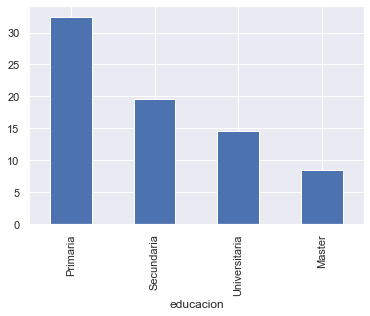

In [16]:
# Analisis por educación
temp = data.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

* Podemos observar que el empleado con menor educación tiene mas tendencia de abandonar el trabajo.
----

----
* ### Analisis por estado civil

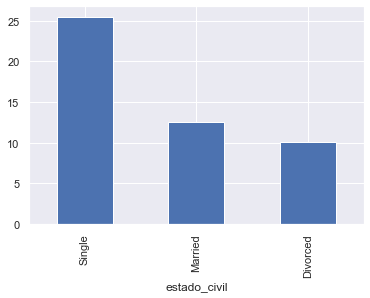

In [17]:
temp = data.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

* Aca también se puede observar que los empleados "solteros" abandonan con mayor frecuencia la empresa
----

----
* ### Analisis por horas extras

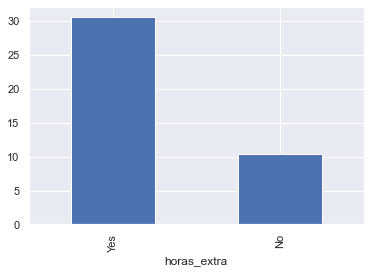

In [18]:
temp = data.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

* Se observa que los empleados que hacen mayormente horas extras tienen una gran tendencia en abandonar la empresa.
---

----
* ### Analisis por puesto

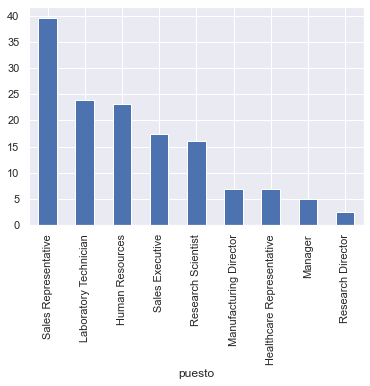

In [19]:
temp = data.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

* Podemos obvservar también que un 40% en el puesto de "Sales Representative" (Representantes de venta) abandona la empresa.
----

----
* ### Análisis salario mensual

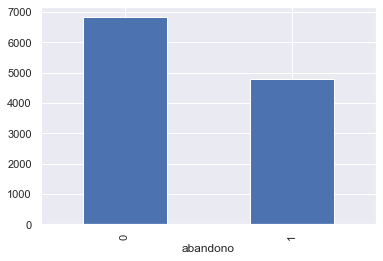

In [20]:
temp = data.groupby('abandono').salario_mes.mean()
temp.plot.bar();

* Vemos que los empleados que tienen menos salario al mes abandona mas la empresa.
---

----
* # Conclusiones:
* ### El perfil medio del empleado que deja la empresa tiene:

    * Bajo nivel educativo
    * Soltero
    * Trabaja en la parte de ventas
    * Bajo salario
    * Mucha carga de horas extras
----

---
### ¿Cual es el impacto económico de este problema?

Según el estudio sacado desde google "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [21]:
# Creamos una nueva variable salario_ano del empleado
data['salario_ano'] = data.salario_mes.transform(lambda x: x*12)
data[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


* Pasamos y creamos el salario ANUAL, es decir lo multiplicamos por 12 meses
---

In [22]:
#### Crearemos una serie de criterios teniendo en cuenta el estudio de "Cost of Turnover"

# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(data['salario_ano'] <= 30000),
               (data['salario_ano'] > 30000) & (data['salario_ano'] <= 50000),
               (data['salario_ano'] > 50000) & (data['salario_ano'] <= 75000),
               (data['salario_ano'] > 75000)]

#Lista de resultados
resultados = [data.salario_ano * 0.161, data.salario_ano * 0.197, data.salario_ano * 0.204, data.salario_ano * 0.21]
                
#Aplicamos select
data['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

data.head()


,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352


-----
* ### ¿Cúanto nos ha costado este problema en el último año?

In [23]:
coste_total =  data.loc[data.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

---
* ### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [24]:
data.loc[(data.abandono == 1) & (data.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

---
* ### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [25]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


* Hacemos los 3 tipos de escenarios (Esperable - Positivo - Negativo)

* 10% = Negativo
* 20% = Esperable
* 30% = Positivo
----

* ### Podemos seguir trazando estrategias asociadas a los insights de abandono:


* Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?


* Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [26]:
total_repre_pasado = len(data.loc[data.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(data.loc[(data.puesto == 'Sales Representative') & (data.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado*100

39.75903614457831

In [27]:
total_repre_actual = len(data.loc[(data.puesto == 'Sales Representative') & (data.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

* #### Se pueden ir de la empresa unos 19 empleados del sector comercial
----

----
* ### Hacemos una cuenta de que pasaria si retenemos por ejemplo el 30% de los 19 empleados posibles a abandonar la empresa.

In [28]:
retenemos = int(se_iran * 0.3)

ahorramos = data.loc[(data.puesto == 'Sales Representative') & (data.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


* ### Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

* ### Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada
----


----

# CREAMOS UN MODELO DE MACHINE LEARNING 

In [34]:
data_ml = data.copy() 

In [35]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [45]:
#Categóricas
cat = data_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = cat.columns)).reset_index(drop = True)

In [47]:
cat_ohe.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


* Obtenemos 48 tipos de columnas luego de dummyficarlas
---

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [48]:
num = data.select_dtypes('number').reset_index(drop = True)

In [51]:
data_ml = pd.concat([cat_ohe,num], axis = 1)
data_ml.head()

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352


#### Separación predictoras y target

In [53]:
x = data_ml.drop(columns='abandono')
y = data_ml['abandono']

#### Separación train y test

In [55]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [57]:
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [58]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.04899777, 0.56666667, 0.08823529, 0.04899777, 0.0703125 ,
       0.30434783, 0.30434783, 0.34615385, 0.56666667, 0.04899777,
       0.42105263, 0.04899777, 0.08823529, 0.08823529, 0.0703125 ,
       0.04899777, 0.04899777, 0.04899777, 0.04899777, 0.08823529])

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(test_y,pred) 

0.7193084693084693

* Si el modelo está por debajo de 0.7 nos indica que el modelo no es muy bueno.


* Si el modelo está entre 0.7 y 0.8 nos indica que el modelo es bueno y practico.


* Si el modelo está entre 0.8 y 1.0 nos indica que el modelo es muy bueno.}
----

### INTERPRETACIÓN


#### Grafica del árbol

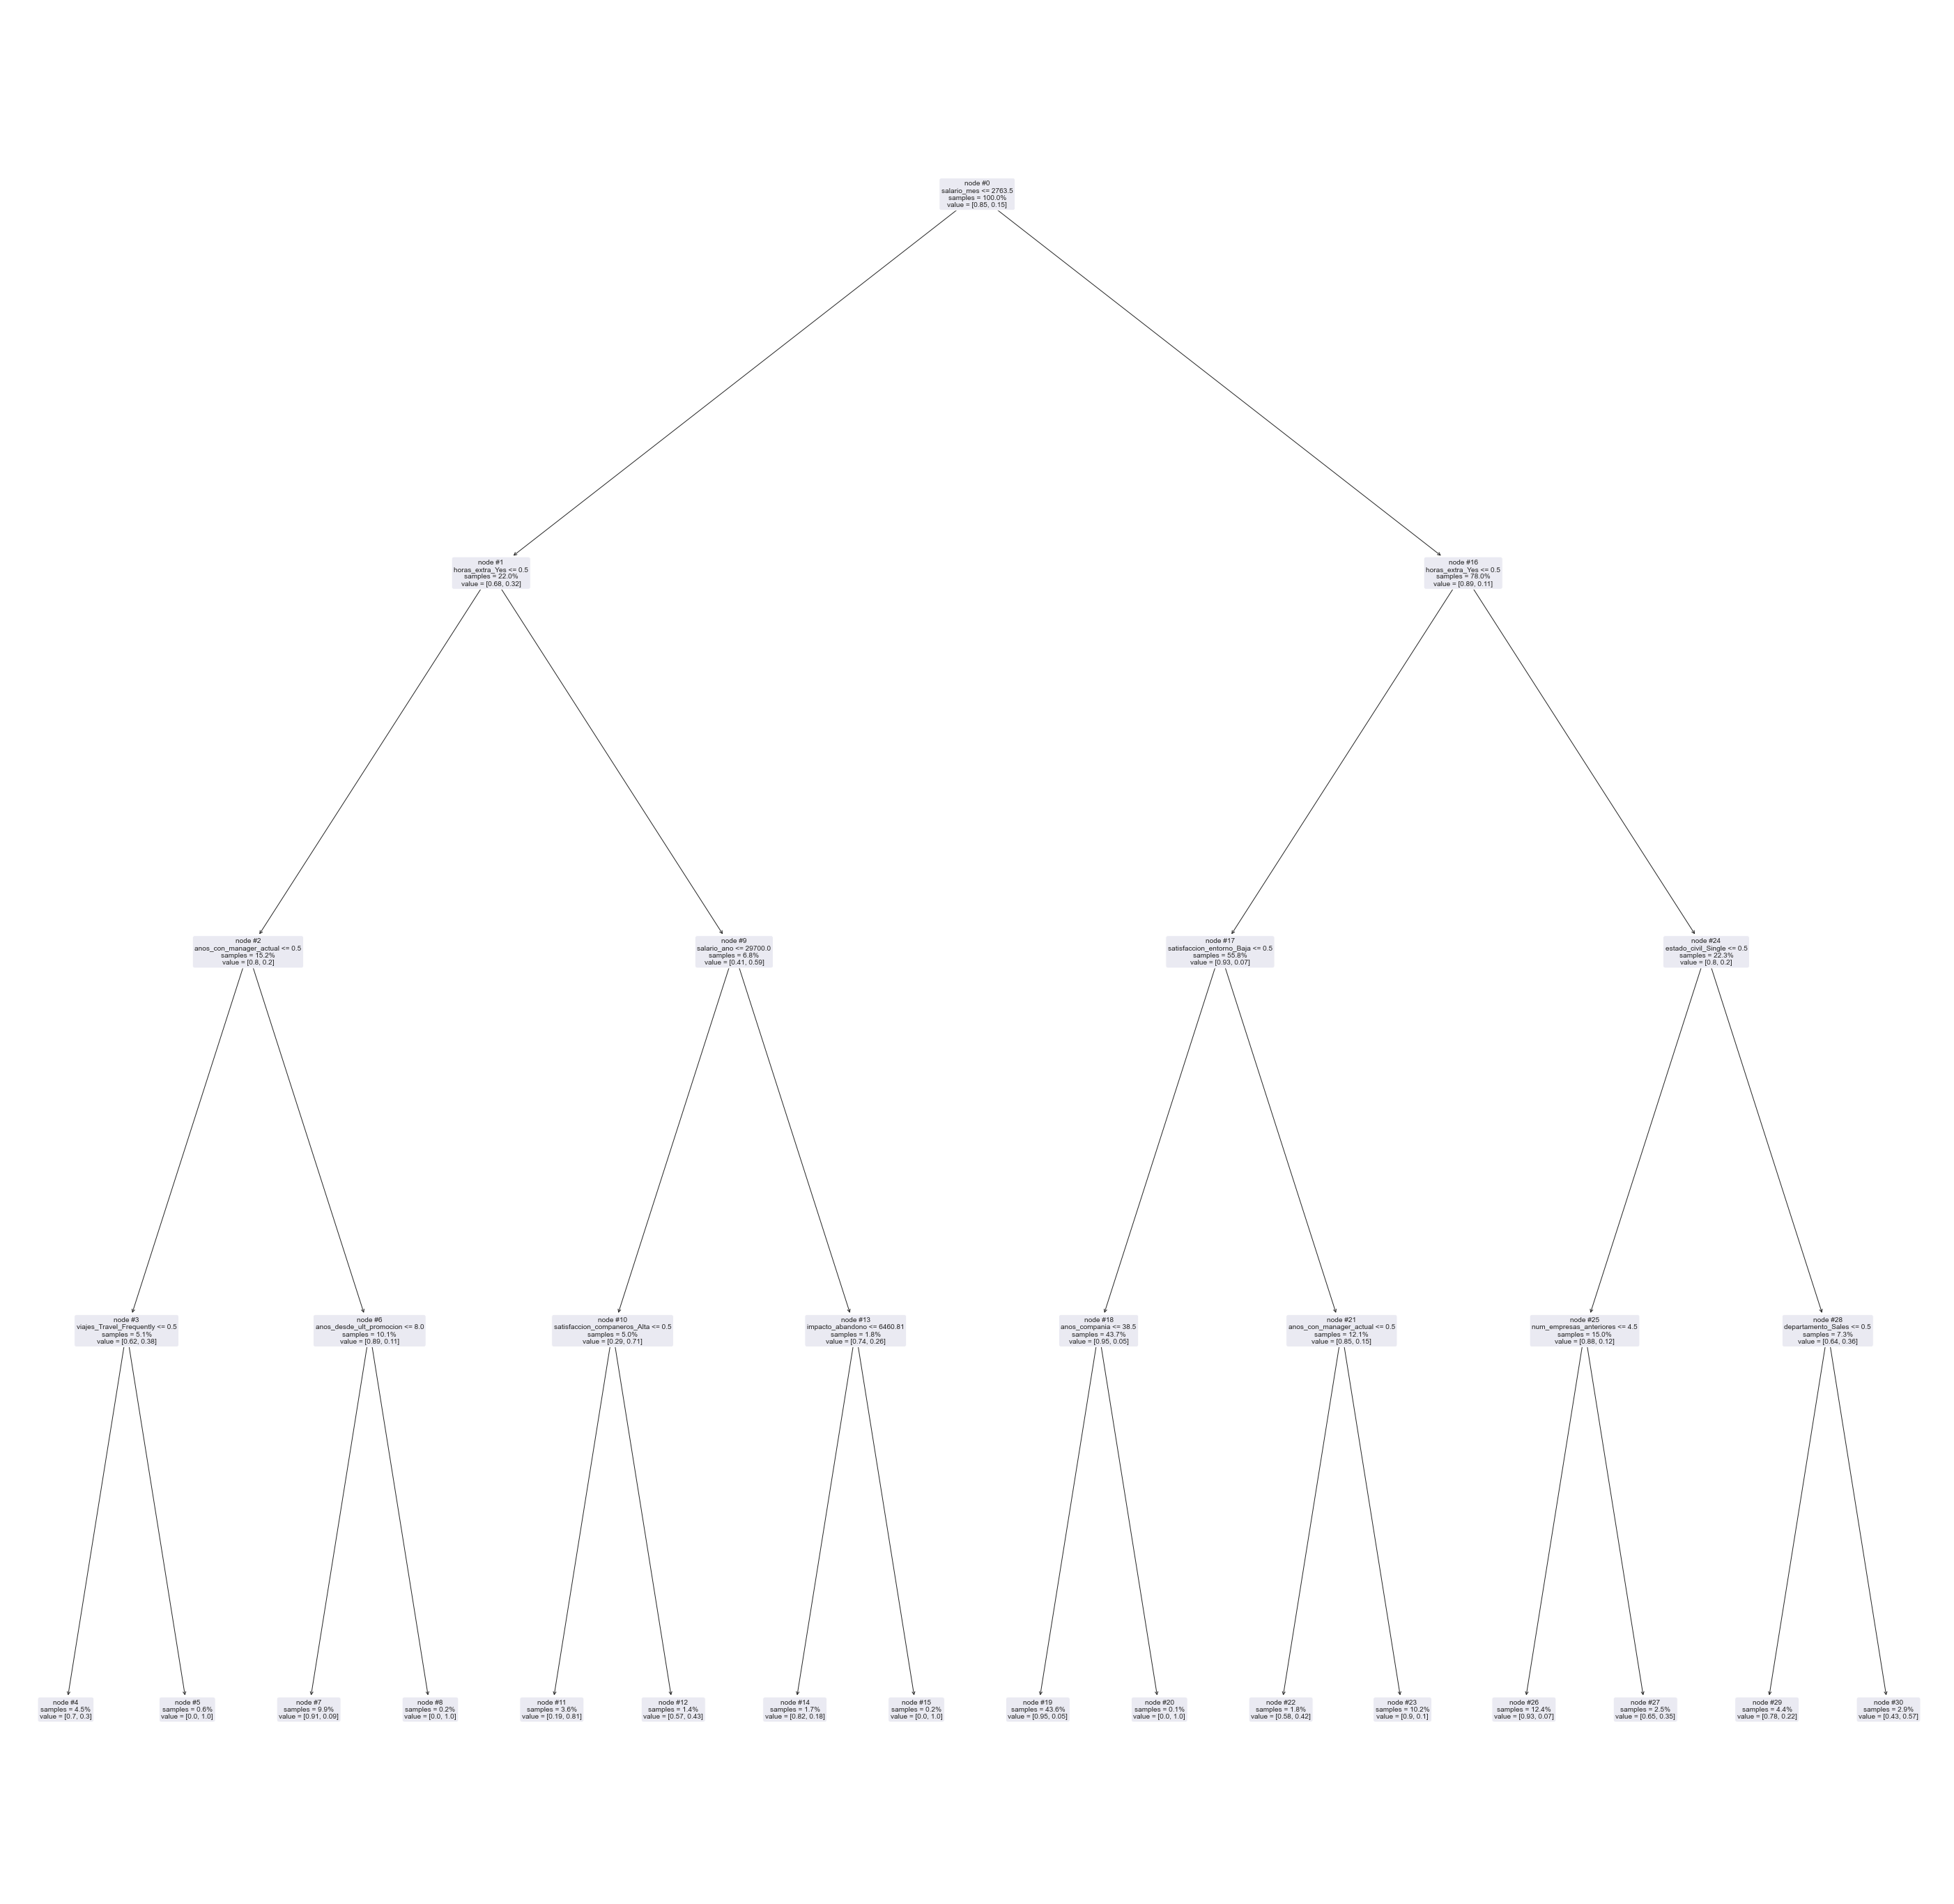

In [61]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

* ### Segun la predicción con el árbol de decisión el tipo de perfil que tiene mas tendencia a abdonar el trabajo es:
* **Tengamos en cuenta que el valor total de la predicción fue buena (71%) veremos si podremos mejorar el modelo  y ahi si dar como sentado los perfiles que mas tendencia tiene al abandono**.
    * No hace horas extras
    * No tiene satifacción de entorno
    * Pocos años en la compania

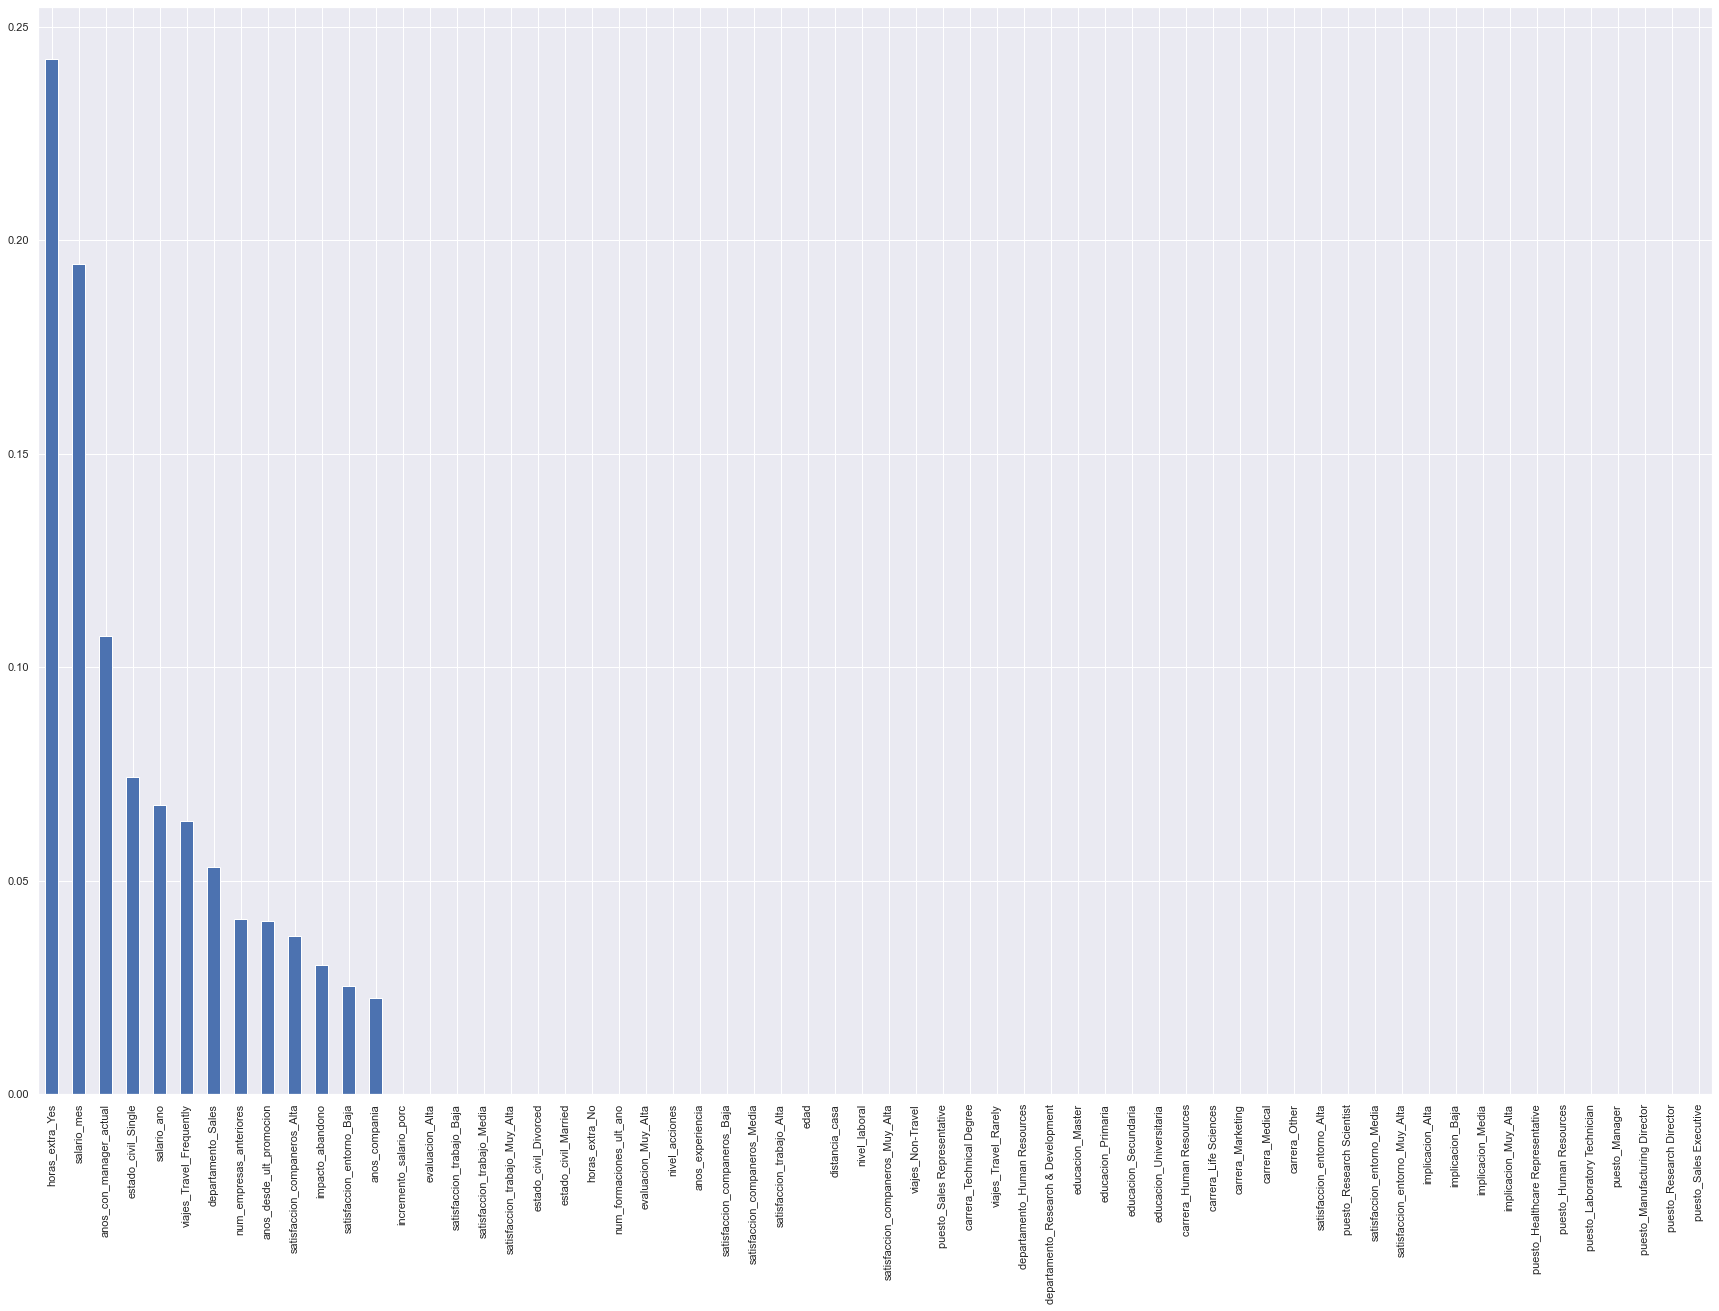

In [62]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

 * ### Segun el modelo creado tenemos 13 variables que son las mas importantes y la podemos dividir en 3 estapas desde las mas importantes a las que menos importancia le dio el modelo.
     * Si hace horas extras - salario mensual 
     
     * Año con su manager - si esta soltero - salario anual - si viaja con frecuencia - alquila 
     
     * Numeros de empresas anteriores - años de su ultima promoción - Satifación con sus compañero si es alta o no- impacto de abandono - si tiene satifación de entorno baja o no - años que se encuentra en la compania
----

In [65]:
data['scoring_abandono'] = ac.predict_proba(data_ml.drop(columns = 'abandono'))[:, 1]
data.head()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.566667
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.048998
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.810811
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.070312
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.104762


----
* ### Veremos 10 empleados con mayor probabilidad de dejar la empresa.

In [67]:
data.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
752,42,1,Travel_Frequently,Research & Development,19,Universitaria,Medical,Alta,Muy_Alta,1,...,Muy_Alta,0,7,2,2,2,2,33108,6522.276,1.0
555,34,1,Travel_Frequently,Sales,6,Primaria,Marketing,Muy_Alta,Baja,1,...,Muy_Alta,1,3,3,2,1,0,28212,4542.132,1.0
235,19,1,Travel_Frequently,Sales,1,Primaria,Technical Degree,Alta,Baja,1,...,Baja,0,1,5,0,0,0,27900,4491.900,1.0
1427,31,1,Travel_Frequently,Sales,1,Primaria,Life Sciences,Media,Baja,1,...,Media,0,1,3,1,0,0,16308,2625.588,1.0
1928,29,1,Travel_Frequently,Sales,24,Universitaria,Technical Degree,Alta,Muy_Alta,1,...,Muy_Alta,0,1,3,1,0,0,13092,2107.812,1.0
165,58,1,Travel_Rarely,Research & Development,23,Universitaria,Medical,Muy_Alta,Alta,3,...,Muy_Alta,1,40,3,40,15,6,123744,25986.240,1.0
79,38,0,Travel_Frequently,Research & Development,29,Universitaria,Life Sciences,Muy_Alta,Alta,2,...,Muy_Alta,0,10,2,10,9,9,28872,4648.392,1.0
2023,23,1,Travel_Frequently,Sales,9,Universitaria,Marketing,Muy_Alta,Alta,1,...,Baja,1,1,3,1,1,0,21480,3458.280,1.0
680,30,0,Travel_Frequently,Research & Development,3,Universitaria,Medical,Alta,Alta,1,...,Alta,1,1,2,1,0,0,24996,4024.356,1.0


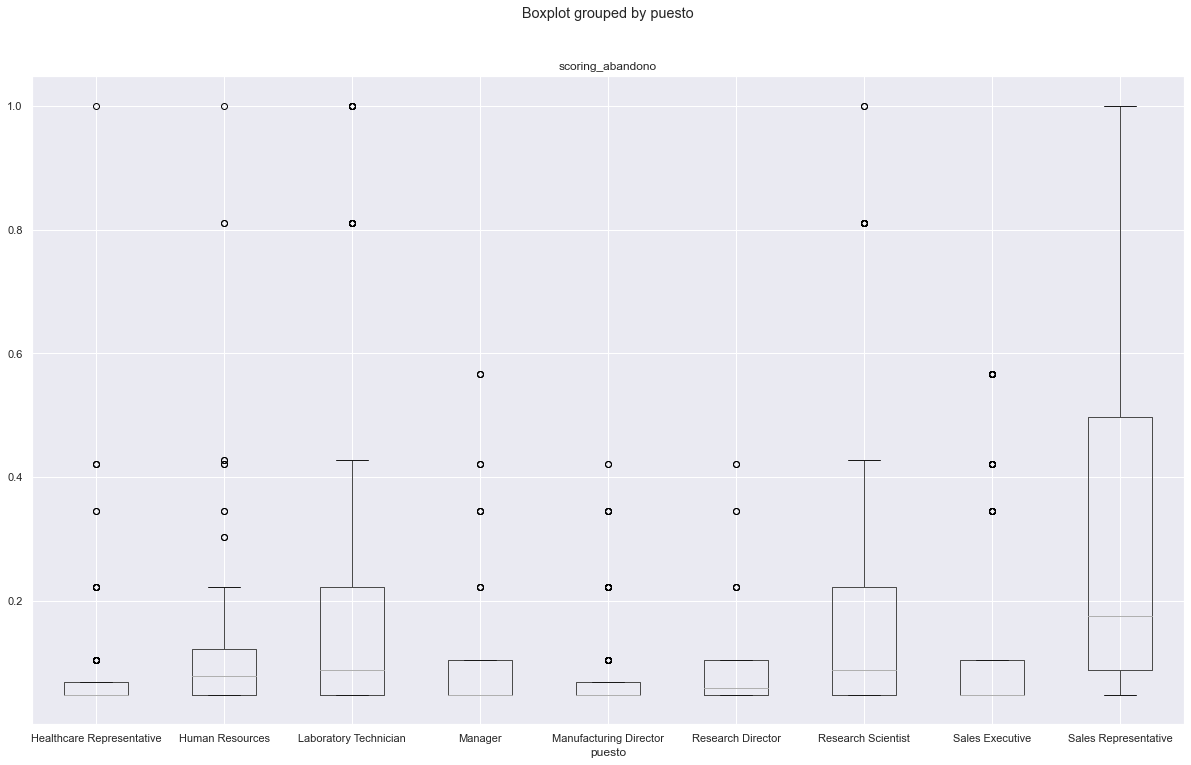

In [68]:
data.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

In [69]:
data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.566667
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.048998
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.810811
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.070312
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.104762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.088235
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.048998
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.070312


----
## Pasamos el DF a formato EXCEL para luego mostrar los resultados en un DASHBOARD

In [70]:
data.to_excel("Abandono_con_scoring.xlsx")

* # LINK DEL DASHBOARD:

https://public.tableau.com/app/profile/fernando.ojeda4477/viz/GraficaAnlisisabandonodeempleados2022-2023/Dashboard1?publish=yes